In [1]:
# Classification

    У даній лабораторній роботі на основі даних про автомобілі спробуємо побудувати моделі їхньої класифікації. Для цього розглянемо їхню класифікацію за ознакою symboling, яка означає рівень ризику від страхування автомобіля.
    У даній роботі розглянемо класифікацію з використанням моделі логістичної регресії, методу опорних векторів, k-найближчих сусідів, байєсової класифікації, моделі лерева рішень та випадкового лісу, а також нейронних мереж.
    Для кожної розглянутої моделі буде розраховуватися метрика Accuracy та будуватися матриця невідповідностей.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df=pd.read_csv('Cars_prep (Tomilovych, EC-61).csv', sep=';')
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,16500.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,16500.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,0,0,1,16845.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,0,0,1,19045.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,1,0,0,0,1,21485.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,1,0,0,1,0,22470.0


In [4]:
# Descriptive Statistics
df.describe()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.434146,0.014634,98.736585,174.049268,65.907805,53.724878,2555.565854,...,0.063415,0.053659,0.775610,0.029268,0.117073,0.053659,0.321951,0.097561,0.458537,13121.673171
std,1.245307,0.297446,0.385535,0.496858,0.120377,5.954301,12.337289,2.145204,2.443522,520.680204,...,0.244304,0.225894,0.418201,0.168970,0.322294,0.225894,0.468368,0.297446,0.499498,7570.378110
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10595.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,16500.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,116.800000,208.100000,72.300000,59.800000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36813.000000


    Для початку зведемо задачу класифікації до бінарної класифікації. Автомобілі в наборі даних поділені на 6 упорядкованих класів: від -2 до 3: чим менший номер класу, тим менш ризиковим є страхування такого автомобіля і навпаки. Об'єднаємо класи -2, -1 і 0 в єдиний клас 0, який позначатиме низьку ризиковість страхування автомобіля, а класи 1, 2 і 3 - в єдиний клас 1, що позначатиме клас автомобілів з високою ризиковістю страхування.

In [5]:
# Merging Classes
classes=[]
for clss in df['symboling']:
    if clss>=1:
        clss=1
    elif clss<=0:
        clss=0
    classes.append(clss)
df.drop('symboling', axis=1, inplace=True)
df['symboling']=classes
df

,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,...,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price,symboling
0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,1,0,0,0,0,0,1,13495.0,1
1,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,1,0,0,0,0,0,1,16500.0,1
2,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,0,1,16500.0,1
3,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,1,0,0,0,0,0,1,13950.0,1
4,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,1,0,0,0,0,0,0,1,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,109.1,188.8,68.9,55.5,2952,141,...,0,1,0,0,0,0,0,1,16845.0,0
201,1,1,0,0,109.1,188.8,68.8,55.5,3049,141,...,0,1,0,0,0,0,0,1,19045.0,0
202,1,0,0,0,109.1,188.8,68.9,55.5,3012,173,...,0,0,0,1,0,0,0,1,21485.0,0
203,0,1,0,0,109.1,188.8,68.9,55.5,3217,145,...,0,0,0,1,0,0,1,0,22470.0,0


    Для перевірки класифікаційний якостей моделей спостереження були розбиті на навчальну (80%) і тестову (20%) вибірки. Навчання моделі буде проводитися відповідно на навчальній вибірці, а для перевірки їх здатності для класифікації буде використано тестову вибірку.

In [6]:
# Splitting the dataset into the Training set and Test set
X=df.iloc[:, 0:45].values
y=df.iloc[:, 45:46].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

    Для задачі класифікації кількісні ознаки будуть прошкальовані. При цьому немає необхідності шкалювати ознаки, отримані в результаті кодування якісних змінних, а також залежну змінну symboling, яка була приведена до значень 0 і 1.
    Для шкалювання і навчальної, і тестової вибірки будуть використовуватися параметри шкалювання навчальної вибірки.

In [7]:
# Feature Scaling
numeric_columns=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 44]
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler().fit(X_train[:, numeric_columns])
X_train[:, numeric_columns]=sc_X.transform(X_train[:, numeric_columns])
X_test[:, numeric_columns]=sc_X.transform(X_test[:, numeric_columns])

    Далі розглянемо першу з моделей класифікації - логістичну регресію. Для неї спробуємо визначити значущість залежних змінних за допомогою p-значень, аби відкинути незначущі змінни, спростивши таким чином модель, але незначно втративши в її якості.

In [8]:
# Logistic Regression

In [9]:
# Baseline model
import statsmodels.api as sm
lr=sm.Logit(y_train, X_train).fit()
print(lr.summary2())

C:\Users\TOV\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\TOV\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

    Спроба оцінити параметри логістичної регресії та відповідні p-значення не вдалася через виродженість матриці, яка використовувалася для цього.
    Спроба оцінити параметри логістичної регресії та відповідні p-значення з використанням інших методів оптимізації та числа ітерацій не мало успішного результату: виникала помилка, що провести оптимізацію логістичної моделі не вдавалося, у результаті чого були отриманні або абсолютно незначущі параметри, або як параметри видавалися порожні значення.
    Звідси постає необхідність вирішення такої проблеми, однією з яких є скорочення числа залежних змінних. Зважаючи, що їх у розглядуваному наборі даних аж 45, то їхнє скорочення все одно може дозволити ефективну класифікацію на основі залишкових факторних змінних.
    Спочатку спробуємо використати автоматичний відбір найкращих змінних з допомогою методу рекурсивного виключення з кросвалідацією.

In [10]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


15
[False False  True False  True False  True False  True False False False
 False False False False False  True False  True False False  True  True
 False  True False  True  True False False  True False False  True False
 False False False False  True False False  True False]
[14 27  1 17  1 23  1 28  1  3  6 22 24 26 29 15 16  1  2  1 19  4  1  1
 13  1 31  1  1  7  5  1  8 21  1 30 12 25  9 18  1 11 10  1 20]


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


    Автоматично було відібрано 15 змінних з 45, які є найкращими для побудови моделі логістичної регресії. Ці ознаки відображені нижче.

In [11]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[2, 4, 6, 8, 17, 19, 22, 23, 25, 27, 28, 31, 34, 40, 43]
№	Index	Feature
0	2	num-of-doors
1	4	wheel-base
2	6	width
3	8	curb-weight
4	17	make.honda
5	19	make.mitsubishi
6	22	make.subaru
7	23	make.toyota
8	25	make.volvo
9	27	body-style.sedan
10	28	body-style.wagon
11	31	engine-type.dohc
12	34	engine-type.ohcf
13	40	fuel-system.1bbl
14	43	fuel-system.mpfi


In [12]:
# Leaving only Selected Features
X_train_select=X_train[:, selected_columns]
X_test_select=X_test[:, selected_columns]

    Спробуємо оцінити значущість відібраних 15 ознак для моделі логістичної регресії за p-значеннями.

In [13]:
# Baseline model
import statsmodels.api as sm
lr=sm.Logit(y_train, X_train_select).fit()
print(lr.summary2())

         Current function value: 0.207370
         Iterations: 35
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.699     
Dependent Variable:   y                AIC:              98.0174   
Date:                 2020-10-20 17:16 BIC:              144.5154  
No. Observations:     164              Log-Likelihood:   -34.009   
Df Model:             14               LL-Null:          -113.08   
Df Residuals:         149              LLR p-value:      1.6796e-26
Converged:            0.0000           Scale:            1.0000    
No. Iterations:       35.0000                                      
-------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
-------------------------------------------------------------------
x1    3.0780       0.8918  3.4514 0.0006        1.3301       4.8259
x2   -2.3100       1.1066 -2.0874 0.0369       -4.4789      -0.1410
x3    2.3

C:\Users\TOV\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


    Для відібраних 15 змінних через помилку оптимізації знову не вдалося вивести оптимальні значення параметрі моделі логістичної регресії, що не дозволяє говорити про адекватність отриманих результатів: багато з них виявилися незначущими, а для деяких параметрів оптимізації взагалі видавалися порожні значення параметрів та p-значень.
    Звідси розглянемо можливість скорочення відібраних ознак, для початку на одну, тобто до 14 найкращих. Для цього використаємо метод рекурсивного виключення, але цього разу не автоматичний, а задамо у параметрах відбір тільки 14 найкращих параметрів з усіх 45.

In [14]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFE(estimator, n_features_to_select=14, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


14
[False False  True False  True False  True False  True False False False
 False False False False False  True False  True False False  True  True
 False False False  True  True False False  True False False  True False
 False False False False  True False False  True False]
[15 28  1 18  1 24  1 29  1  4  7 23 25 27 30 16 17  1  3  1 20  5  1  1
 14  2 32  1  1  8  6  1  9 22  1 31 13 26 10 19  1 12 11  1 21]


C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


    14 найкращих факторних змінних для побудови моделі лінійної регресії відображено нище.

In [15]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[2, 4, 6, 8, 17, 19, 22, 23, 27, 28, 31, 34, 40, 43]
№	Index	Feature
0	2	num-of-doors
1	4	wheel-base
2	6	width
3	8	curb-weight
4	17	make.honda
5	19	make.mitsubishi
6	22	make.subaru
7	23	make.toyota
8	27	body-style.sedan
9	28	body-style.wagon
10	31	engine-type.dohc
11	34	engine-type.ohcf
12	40	fuel-system.1bbl
13	43	fuel-system.mpfi


In [16]:
# Leaving only Selected Features
X_train_select=X_train[:, selected_columns]
X_test_select=X_test[:, selected_columns]

    Спробуємо оцінити значущість найкращих 14 ознак для моделі логістичної регресії за p-значеннями.

In [17]:
# Baseline model
import statsmodels.api as sm
lr=sm.Logit(y_train, X_train_select).fit(method='lbfgs', maxiter=100)
print(lr.summary2())

                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.697     
Dependent Variable:     y                  AIC:                96.5722   
Date:                   2020-10-20 17:16   BIC:                139.9704  
No. Observations:       164                Log-Likelihood:     -34.286   
Df Model:               13                 LL-Null:            -113.08   
Df Residuals:           150                LLR p-value:        6.0758e-27
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         55.0000                                          
-------------------------------------------------------------------------
     Coef.      Std.Err.       z    P>|z|       [0.025         0.975]    
-------------------------------------------------------------------------
x1    3.1183         0.9057  3.4430 0.0006          1.3432         4.8934
x2   -2.5118         1.0683 -2.3513 0.0187         -4.6055        -0

    Для 14 ознак вдалося провести оптимізацію моделі логістичної регресії з використанням методу lbfgs та задання числа ітерацій в 100, хоча для оптимізації вистачило всього 55 ітерацій, хоча деякі змінні й були показані як абсолютно незначущі (їхні p-значення рівні або близькі до 1).
    З цих 14 змінних відберемо ті змінні, які значущі за p-значенням з рівнем значущості 0,05 (тобто з довірчою ймовірністю в 95%). Для цього їхні p-значення мають бути менші за 0,05. Таких ознак всього 8: якісна змінна num-of-doors, кількісні змінні wheel-base, width, curb-weight, а також знову якісні змінні make.toyota, body-style.sedan, body-style.wagon і fuel-system.mpfi.
    Оскільки відібраних ознак більше, ніж 3, то немає можливості побудови графіку результатів класифікації моделями, що розглядатимуться в даній роботі: для цього необхідно будувати моделі на основі 3 і менше ознак, оскільки візуалізація результатів можлива максимум з використанням 3-вимірних графіків. Разом з тим, існують способи позначення значеннь більш, ніж 3 вимірів за допомогою кольору, форми, розміур точок на проекції на графік і т.п., але їх не буде розглянуто в даній роботі.
    На основі відібраних 8 ознак побудуємо модель логістичної регресії і проведемо перевірку її здатності до класифікації, розрахувавши для неї метрику Accuracy і побудувавши матрицю невідповідностей її результатів для тествої вибірки.

In [18]:
# Features selection
opt_columns=[0, 1, 2, 3, 7, 8, 9, 13]
X_train_opt=X_train_select[:, opt_columns]
X_test_opt=X_test_select[:, opt_columns]

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
slr=LogisticRegression(random_state=123).fit(X_train_opt, y_train)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
# Predicting the Test set results
y_pred_logit=slr.predict(X_test_opt)
logistic_score=slr.score(X_test_opt, y_test)
logistic_score

0.9024390243902439

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
logistic_cm=confusion_matrix(y_test, y_pred_logit)
print(logistic_cm)

[[15  2]
 [ 2 22]]


    Можна побачити, що точність класифікації автомобілів з тестової вибірки логістичною регресією складає приблизно 90%, що є досить непоганим результатом, а також, що всього 2 високоризикові для страхування автомобілі були класифіковані як низькоризикові і 2 низькоризикові - як високоризикові, тобто не спостерігається перекосу між непрвильним визначенням низько- та високоризикових автомобілів.
    Далі розглянемо класифікацію з допомогою методу опорних векторів.

In [22]:
# Support Vector Machine (SVM)

    Для методу опорних векторів розглянемо моделі з використанням різних ядр (кернелів).

In [23]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm1=SVC(kernel='rbf', random_state=123).fit(X_train_opt, y_train)
svm2=SVC(kernel='linear', random_state=123).fit(X_train_opt, y_train)
svm3=SVC(kernel='poly', random_state=123).fit(X_train_opt, y_train)
svm4=SVC(kernel='sigmoid', random_state=123).fit(X_train_opt, y_train)
# svm5=SVC(kernel='precomputed', random_state=123).fit(X_train_opt, y_train)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


    Було побудовано моделі з використанням 4 з 5 доступних ядр (кернелів). Єдине ядро, яке не було використано при моделюванні, вимагає квадратної матриці залежних змінних, якою не є розглядувана в даній роботі матриця.
    Для цих моделей розрахуємо метрику точності Accuracy, аби відбрати найкращу та вести подальшу роботу з нею, а також використовувати її для порівняння з моделями іншого типу.

In [24]:
# Accuracy Scores
svm1_score=svm1.score(X_test_opt, y_test)
svm2_score=svm2.score(X_test_opt, y_test)
svm3_score=svm3.score(X_test_opt, y_test)
svm4_score=svm4.score(X_test_opt, y_test)
svm1_score, svm2_score, svm3_score, svm4_score

(0.9024390243902439,
 0.9024390243902439,
 0.9024390243902439,
 0.7560975609756098)

    3 з 4 побудованих моделей показали однакову найвищу точність класифікації для всіх моделей побудованих за методом опорних моделей - приблизно 90%. Для них проведемо розрахунки результатів тестової вибірки та побудуємо матриці невідповідностей.

In [25]:
# Predicting the Test set results
y_pred_svm1=svm1.predict(X_test_opt)
y_pred_svm2=svm2.predict(X_test_opt)
y_pred_svm3=svm3.predict(X_test_opt)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
SVM1_cm=confusion_matrix(y_test, y_pred_svm1)
SVM2_cm=confusion_matrix(y_test, y_pred_svm2)
SVM3_cm=confusion_matrix(y_test, y_pred_svm3)
print(SVM1_cm)
print(SVM2_cm)
print(SVM3_cm)

[[16  1]
 [ 3 21]]
[[15  2]
 [ 2 22]]
[[16  1]
 [ 3 21]]


     Можна побачити, що матриці невідповідностей 1 і 3 моделі SVM є однаковими: у них 3 високоризикові для страхування автомобілі були класифіковані як низькоризикові і 1 низькоризиковий - як високоризиковий, тобто спостерігається незначний перекіс у сторону неправильного визначення високоризикових автомобілів. На практиці це означає, що страхова компанія піддається більшому ризику через неправильно визначений страховий клас високоризикових автомобіля.
     Що ж до 2 моделі SVM, то її матриця невідповідностей відповідає матриці невідповідностей моделі логістичної регресії, а отже має ті самі висновки, що й вона.
     Далі розглянемо байєсівську класифікацію.

In [27]:
# Naive Bayes

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train_opt, y_train)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# Predicting the Test set results
y_pred_nb=nb.predict(X_test_opt)
nb_score=nb.score(X_test_opt, y_test)
nb_score

0.7804878048780488

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm=confusion_matrix(y_test, y_pred_nb)
print(nb_cm)

[[10  7]
 [ 2 22]]


    Отримана модель має меншу здатність до класифікації, ніж попередні розглянуті типи моделей: її точність складає всього 78%. Також спостерігається перекіс у сторону неправильно позначення низькоризикових автомобілів як високоризикових: усього виявлено 7 таких випадків проти 2 високоризикових автомобілів, позначених як низькоризикових.
    Це може бути корисно в разі прагнення страхової компанії усунути ризик недооцінки рівня ризикованості автомобіля, хоча не позбавлється такого ризику повністю. З іншого боку, для великої частини низькоризикованих автомобілів може пропонуватися дорожчий страховий план для високоризикованих автомобілів, що може відвернути таких клієнтів від компанії, або взагалі нераціонально відмовляється в страхуванні, що також зиеншує число низькоризикових клієнтів компанії.
    Далі розглянемо класифікацію за методом k найближчих сусідів.

In [31]:
# K-Nearest Neighbors (K-NN)

    Для цього методу знайдемо оптимальне число k найближчих сусідів, якому відповідає найменше значення помилки передбачення для тестової вибірки, з усіх цілих чисел з інтервалу [1; 49].

<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was e

<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was e

Minimum error:- 0.4646044021415824 at K = 8


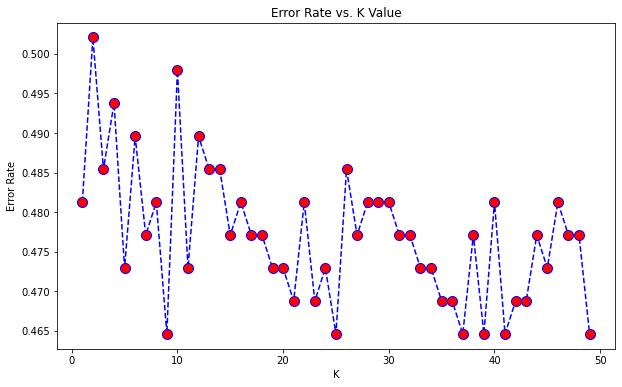

In [32]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,50):
     knn=KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train_opt, y_train)
     pred_i=knn.predict(X_test_opt)
     error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

    Оптимальним числом k для побудови моделі класифікації за методом k найближчих сусідів виявилося 8. Власне для нього й будуємо відповідну модель.

In [33]:
# Fitting K-NN to the Training set
knn=KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='minkowski', p=2).fit(X_train_opt, y_train)

<ipython-input-33-874b587b9665>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn=KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='minkowski', p=2).fit(X_train_opt, y_train)


In [34]:
# Predicting the Test set results
y_pred_knn=knn.predict(X_test_opt)
knn_score=knn.score(X_test_opt, y_test)
knn_score

0.7317073170731707

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test, y_pred_knn)
print(knn_cm)

[[11  6]
 [ 5 19]]


    Отримана модель має меншу здатність до класифікації, ніж попередні розглянуті типи моделей: її точність складає всього 73%. Також 6 низькоризикових автомобілів було позначено як високоризикові, а 5 високоризикових - як низькоризикові.
    Таким чином не можна говорити про високу здатність такої моделі до класифікації порівняно з іншими моделями, а отже й доцільності використання саме її, а не інших типів моделі.
    Далі розглянемо класифікацію з використанням дерева рішень.

In [36]:
# Classification Tree

    Для цієї моделі знайдемо оптимальне значення параметру max_leaf_nodes серед цілих чисел з інтервалу [2; 20] за критерієм найменшої метрики MSE для тестової вибірки.

In [37]:
# Function Max Leaf
def max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train=[]
    mse_test=[]
    for i in n:
        rf=DecisionTreeRegressor(max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' leaves\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax=plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    i=2

2 leaves	0.1254093447978693
None
3 leaves	0.08543429300671439
None
4 leaves	0.088018746548816
None
5 leaves	0.06846623697413348
None
6 leaves	0.06420072905660586
None
7 leaves	0.04836357449128856
None
8 leaves	0.055990396090756116
None
9 leaves	0.047209908285878066
None
10 leaves	0.04208795706636587
None
11 leaves	0.04208795706636587
None
12 leaves	0.06550259121270734
None
13 leaves	0.06158131335196955
None
14 leaves	0.050742898717823205
None
15 leaves	0.078730703595872
None
16 leaves	0.08610377477556339
None
17 leaves	0.08560601469592177
None
18 leaves	0.08560601469592177
None
19 leaves	0.10414757766257184
None
20 leaves	0.09805001668696209
None


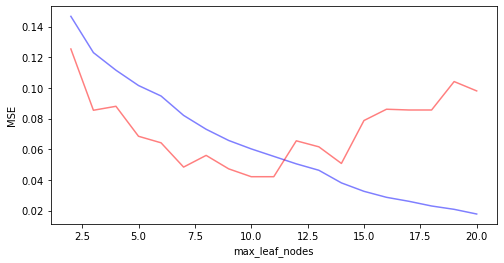

In [38]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, range(2,21))

    Можна побачити, що найменше значення помилки MSE для тествої вибірки спостерігається для max_leaf_nodes рівних 10 і 11. Проведемо побудову моделей з цим параметром, а також з різними критеріямиоптимізації.

In [39]:
# Fitting Classification Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
ct1=DecisionTreeClassifier(max_leaf_nodes=10, criterion='entropy', random_state=123).fit(X_train_opt, y_train)
ct2=DecisionTreeClassifier(max_leaf_nodes=11, criterion='entropy', random_state=123).fit(X_train_opt, y_train)
ct3=DecisionTreeClassifier(max_leaf_nodes=10, criterion='gini', random_state=123).fit(X_train_opt, y_train)
ct4=DecisionTreeClassifier(max_leaf_nodes=11, criterion='gini', random_state=123).fit(X_train_opt, y_train)

    Розрахуємо метрику точності Accuracy для цих варіантів дерева рішень, аби вибрати найкращий з них.

In [40]:
# Accuracy Scores
ct1_score=ct1.score(X_test_opt, y_test)
ct2_score=ct2.score(X_test_opt, y_test)
ct3_score=ct3.score(X_test_opt, y_test)
ct4_score=ct4.score(X_test_opt, y_test)
ct1_score, ct2_score, ct3_score, ct4_score

(0.8780487804878049, 0.8780487804878049, 0.9512195121951219, 0.926829268292683)

    Найкращим варіантом дерева рішень виявилося дерево з параметром max_leaf_nodes рівним 10 і критерієм оптимізації gini: точність класифікації тестової вибірки для такого варіанту моделі виявилася рівною приблизно 95%. Саме таку модель і будемо використовувати для порівнняння з іншими типами моделей.
    Для цієї моделі побудуємо матрицю невідповідіності для тестової вибірки.

In [41]:
# Predicting the Test set results
y_pred_ct3=ct3.predict(X_test_opt)

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
ct3_cm=confusion_matrix(y_test, y_pred_ct3)
print(ct3_cm)

[[17  0]
 [ 2 22]]


    Ця модель точно віднесла всі низькоризикові автомобілі до правильного класу, але також позначила низькоризикованими 2 високоризиковані автомобілі. Це означає, що модель, хоча й є якісною, проте все ще має ризик страхування високоризикованих автомобілів за розцінками низикоризикованих, що є ризиком для страхової компанії, оскільки може призвести до більш страхових виплат нею, ніж планувалося.
    Далі розглянемо класифікацію за допомогою методу випадкового лісу.

In [43]:
# Random Forest Classification

    Для початку виберемо оптимальне число дерев у випадковому лісу з інтервалів від 1 до 20 по мінімальному значенню метрики MSE для тестової вибірки. Разом з тим, ми виберемо оптимальне число дерев з інтервалу від 1 до 10, аби перевірити чи зростає якість класифікацію моделлю при її ускладненні.

In [44]:
def rf_best_n_estimator(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train=[]
    mse_test=[]
    for i in n:
        rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' trees\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

1 trees	0.0975609756097561
None
2 trees	0.0975609756097561
None
3 trees	0.0813008130081301
None
4 trees	0.07164634146341463
None
5 trees	0.062439024390243916
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


6 trees	0.05758807588075881
None
7 trees	0.05724240915878547
None
8 trees	0.0586890243902439
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


9 trees	0.05691056910569106
None
10 trees	0.05756097560975611
None
11 trees	0.06047167909695625
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


12 trees	0.05606368563685637
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


13 trees	0.055274931447539324
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


14 trees	0.05338476854156296
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


15 trees	0.0532249322493225
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


16 trees	0.05125762195121951
None
17 trees	0.05249388134019749

<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)



None
18 trees	0.05051189400782897
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


19 trees	0.05202351192486993
None


<ipython-input-44-2477ff17394a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


20 trees	0.052317073170731705
None


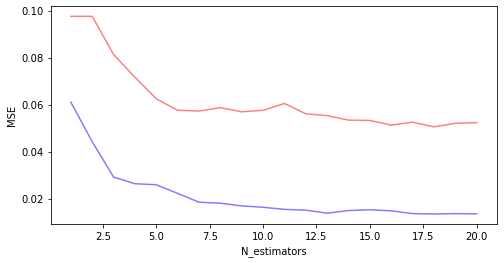

In [45]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train_opt, X_test_opt, y_train, y_test, range(1,21))

    Оптимальним число дерев у випадковому лісі з інтервалу від 1 до 10 виявилося 9, а для інтервалу від 1 до 20 - 18 дерева. Для 9 дерев знайдемо оптимальне значення параметра rf_max_leaf_nodes у інтервалі від 2 до 20, причому також виберемо оптимальне значення цього параметру з інтервалу від 2 до 10.

In [46]:
def rf_max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' leaves\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


2 leaves	0.11364190851401612
None
3 leaves	0.07787604823486119
None
4 leaves	0.07759902187001723
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


5 leaves	0.07380380360576963
None
6 leaves	0.058059254179021705
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


7 leaves	0.051666082728411535
None
8 leaves	0.05314343842372646
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


9 leaves	0.05264611469513107
None
10 leaves	0.05314540341478448
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


11 leaves	0.053185282346851354
None
12 leaves	0.047308141350311896
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


13 leaves	0.05332923956345619
None
14 leaves	0.05721557574915453
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


15 leaves	0.05321007372743596
None
16 leaves	0.052167328793245336
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


17 leaves	0.05111211951327603
None
18 leaves	0.0548831523267117
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


19 leaves	0.060246813328220475
None


<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-72cc1d46945a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=9, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


20 leaves	0.05988483921120391
None


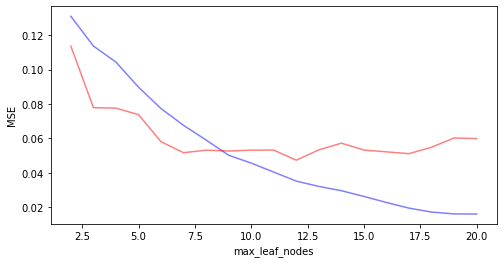

In [47]:
# The optimal number of max_leaf_nodes for 9 trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
rf_max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, range(2,21))

    Оптимальним числом листків у випадковому лісі з 9 дерев виявилося 7 для інтервалу від 2 до 10 і 12 для інтервалу від 2 до 20. Для цих варіантів моделі випадкового лісу побудуємо модель випадкового лісу з критеріями оптимізації MSE і MAE.

In [48]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(n_estimators=9, max_leaf_nodes=7, criterion='mse', random_state=123).fit(X_train_opt, y_train)
rf2=RandomForestRegressor(n_estimators=9, max_leaf_nodes=7, criterion='mae', random_state=123).fit(X_train_opt, y_train)
rf3=RandomForestRegressor(n_estimators=9, max_leaf_nodes=12, criterion='mse', random_state=123).fit(X_train_opt, y_train)
rf4=RandomForestRegressor(n_estimators=9, max_leaf_nodes=12, criterion='mae', random_state=123).fit(X_train_opt, y_train)

<ipython-input-48-568be9d83e10>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1=RandomForestRegressor(n_estimators=9, max_leaf_nodes=7, criterion='mse', random_state=123).fit(X_train_opt, y_train)
<ipython-input-48-568be9d83e10>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2=RandomForestRegressor(n_estimators=9, max_leaf_nodes=7, criterion='mae', random_state=123).fit(X_train_opt, y_train)
<ipython-input-48-568be9d83e10>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3=RandomForestRegressor(n_estimators=9, max_leaf_nodes=12, criterion='mse', random_state=123).fit(X_train_opt, y_train)
<ipython-input-48-568be9d83e10>:6: DataConversionWarning: A 

    Для всіх цих моделей проведемо оцінку класів автомобілів для тестової вибірки, побудуємо матриці невідповідностей і на їх основі розрахуємо метрику торності Accuracy (напряму через score() цього зробити не можна, оскільки у даній роботі використовується регресійна модель дерева лісу, а отже score() видає коефіцієнт детермінації R^2, а не Accuracy).

In [49]:
# Predicting the Test set results
y_pred_rf1=rf1.predict(X_test_opt)
y_pred_rf1=(y_pred_rf1>0.5)
y_pred_rf2=rf2.predict(X_test_opt)
y_pred_rf2=(y_pred_rf2>0.5)
y_pred_rf3=rf3.predict(X_test_opt)
y_pred_rf3=(y_pred_rf3>0.5)
y_pred_rf4=rf4.predict(X_test_opt)
y_pred_rf4=(y_pred_rf4>0.5)

In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rf1_cm=confusion_matrix(y_test, y_pred_rf1)
rf2_cm=confusion_matrix(y_test, y_pred_rf2)
rf3_cm=confusion_matrix(y_test, y_pred_rf3)
rf4_cm=confusion_matrix(y_test, y_pred_rf4)
print(rf1_cm)
print(rf2_cm)
print(rf3_cm)
print(rf4_cm)

[[16  1]
 [ 1 23]]
[[16  1]
 [ 4 20]]
[[16  1]
 [ 1 23]]
[[17  0]
 [ 4 20]]


In [51]:
# Accuracy Scores
rf1_score=(rf1_cm[0, 0]+rf1_cm[1, 1])/(rf1_cm[0, 0]+rf1_cm[1, 1]+rf1_cm[0, 1]+rf1_cm[1, 0])
rf2_score=(rf2_cm[0, 0]+rf2_cm[1, 1])/(rf2_cm[0, 0]+rf2_cm[1, 1]+rf2_cm[0, 1]+rf2_cm[1, 0])
rf3_score=(rf3_cm[0, 0]+rf3_cm[1, 1])/(rf3_cm[0, 0]+rf3_cm[1, 1]+rf3_cm[0, 1]+rf3_cm[1, 0])
rf4_score=(rf4_cm[0, 0]+rf4_cm[1, 1])/(rf4_cm[0, 0]+rf4_cm[1, 1]+rf4_cm[0, 1]+rf4_cm[1, 0])
rf1_score, rf2_score, rf3_score, rf4_score

(0.9512195121951219,
 0.8780487804878049,
 0.9512195121951219,
 0.9024390243902439)

    Можна побачити, що моделі, які оптимізувалися за критерієм MSE мають кращі класифікаційні якості, ніж ті, що оптимізувалися за критерієм MAE. Так, їхній показник Accuracy складає аж 95% і вони класиікували лише 1 низькоризиковий автомобіль як високоризиковий і 1 високоризиковий, як низькоризиковий. З 2 моделей однакової якості, які оптимізувалися за критерієм MSE, виберемо ту, яка є простішою: з 9 деревами та 7 листками замість 12 листків.
    Далі розглянемо вплив збільшення кількості дерев у випадковому лісі на класифікаційну здатність моделі. Для оптимальних 18 дерев з інтервалу [1; 20] знайдемо оптимальне значення параметра rf_max_leaf_nodes у інтервалі від 2 до 20, причому також виберемо оптимальне значення цього параметру з інтервалу від 2 до 10.

In [52]:
def rf_max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' leaves\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


2 leaves	0.11491267915089057
None
3 leaves	0.08820984342176098
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


4 leaves	0.08754107483998358
None
5 leaves	0.08084956717154274
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


6 leaves	0.06930142152430203
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


7 leaves	0.06254907851979044
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


8 leaves	0.06124566175600848
None
9 leaves	0.0567488965567632

<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)



None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


10 leaves	0.05784022579841266
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


11 leaves	0.05565448755136802
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


12 leaves	0.04948735903210426
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


13 leaves	0.05066128355846803
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


14 leaves	0.04911166556085779
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


15 leaves	0.04627671795458894
None
16 leaves	0.045175723383521216

<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)



None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


17 leaves	0.04775187364929375
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


18 leaves	0.04764052186345969
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


19 leaves	0.04940648668050825
None


<ipython-input-52-d03b29e99a00>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=18, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


20 leaves	0.05033137916413179
None


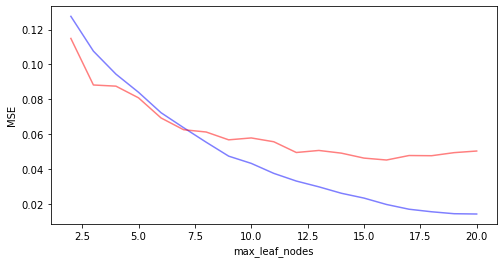

In [53]:
# The optimal number of max_leaf_nodes for 18 trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
rf_max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, range(2,21))

    Оптимальним числом листків у випадковому лісі з 18 дерев виявилося 9 листків для інтервалу від 2 до 10 і 16 листків для інтервалу від 2 до 20. Для цих варіантів моделі випадкового лісу побудуємо модель випадкового лісу з критеріями оптимізації MSE і MAE.

In [54]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf5=RandomForestRegressor(n_estimators=18, max_leaf_nodes=9, criterion='mse', random_state=123).fit(X_train_opt, y_train)
rf6=RandomForestRegressor(n_estimators=18, max_leaf_nodes=9, criterion='mae', random_state=123).fit(X_train_opt, y_train)
rf7=RandomForestRegressor(n_estimators=18, max_leaf_nodes=16, criterion='mse', random_state=123).fit(X_train_opt, y_train)
rf8=RandomForestRegressor(n_estimators=18, max_leaf_nodes=16, criterion='mae', random_state=123).fit(X_train_opt, y_train)

<ipython-input-54-11e6d17913d5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf5=RandomForestRegressor(n_estimators=18, max_leaf_nodes=9, criterion='mse', random_state=123).fit(X_train_opt, y_train)
<ipython-input-54-11e6d17913d5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf6=RandomForestRegressor(n_estimators=18, max_leaf_nodes=9, criterion='mae', random_state=123).fit(X_train_opt, y_train)
<ipython-input-54-11e6d17913d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf7=RandomForestRegressor(n_estimators=18, max_leaf_nodes=16, criterion='mse', random_state=123).fit(X_train_opt, y_train)
<ipython-input-54-11e6d17913d5>:6: DataConversionWarning:

    Для цих моделей проведемо оцінку класів автомобілів для тестової вибірки, побудуємо матриці невідповідностей і на їх основі розрахуємо метрику торності Accuracy (напряму через score() цього зробити не можна, оскільки у даній роботі використовується регресійна модель дерева лісу, а отже score() видає коефіцієнт детермінації R^2, а не Accuracy).

In [55]:
# Predicting the Test set results
y_pred_rf5=rf5.predict(X_test_opt)
y_pred_rf5=(y_pred_rf5>0.5)
y_pred_rf6=rf6.predict(X_test_opt)
y_pred_rf6=(y_pred_rf6>0.5)
y_pred_rf7=rf7.predict(X_test_opt)
y_pred_rf7=(y_pred_rf7>0.5)
y_pred_rf8=rf8.predict(X_test_opt)
y_pred_rf8=(y_pred_rf8>0.5)

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rf5_cm=confusion_matrix(y_test, y_pred_rf5)
rf6_cm=confusion_matrix(y_test, y_pred_rf6)
rf7_cm=confusion_matrix(y_test, y_pred_rf7)
rf8_cm=confusion_matrix(y_test, y_pred_rf8)
print(rf5_cm)
print(rf6_cm)
print(rf7_cm)
print(rf8_cm)

[[16  1]
 [ 1 23]]
[[16  1]
 [ 4 20]]
[[16  1]
 [ 1 23]]
[[16  1]
 [ 2 22]]


In [57]:
# Accuracy Scores
rf5_score=(rf5_cm[0, 0]+rf5_cm[1, 1])/(rf5_cm[0, 0]+rf5_cm[1, 1]+rf5_cm[0, 1]+rf5_cm[1, 0])
rf6_score=(rf6_cm[0, 0]+rf6_cm[1, 1])/(rf6_cm[0, 0]+rf6_cm[1, 1]+rf6_cm[0, 1]+rf6_cm[1, 0])
rf7_score=(rf7_cm[0, 0]+rf7_cm[1, 1])/(rf7_cm[0, 0]+rf7_cm[1, 1]+rf7_cm[0, 1]+rf7_cm[1, 0])
rf8_score=(rf8_cm[0, 0]+rf8_cm[1, 1])/(rf8_cm[0, 0]+rf8_cm[1, 1]+rf8_cm[0, 1]+rf8_cm[1, 0])
rf1_score, rf2_score, rf3_score, rf4_score, rf5_score, rf6_score, rf7_score, rf8_score

(0.9512195121951219,
 0.8780487804878049,
 0.9512195121951219,
 0.9024390243902439,
 0.9512195121951219,
 0.8780487804878049,
 0.9512195121951219,
 0.926829268292683)

    Можна побачити, що найкращі моделі випадкового лісу з 18 дерев максимум повторюють результати класифікації для оптимального випадкового лісу з 9 деревами, але не перевищують її якість. Разом з тим вони є складнішими за неї, а отже раціональніше буде використовувати модель з 9 листками, що демонструє ту саму якість, як і складніші моделі.
    Таким чином, оптимальна модель випадкового лісу rf1 має 9 дерев, 7 листків і оптимізована за критерієм MSE. Саме вона буде порівнюватися з моделями інших типів.

    Далі розглянемо використання нейронних мереж для класифікації. У такому випадку варто використовувати нейронні мережі, що звужуються. При цьому постараємося не використовувати значну кількість нейроннів, аби відповідати умові співвідношення об'єму вибірки та числа ваг w<n/e, де w - число ваг у нейронній мережі, n - число спотережень у навчальній вибірці, e - бажана величина помилки.
    У нашому випадку маємо n=0,8*205=164 спостереження у навчальній вибірці, а при помилці e від 0,05 до 0,1 максимальне число ваг не має перевищувати 3280 і 1640 відповідно. У даній роботі розглянемо нейронні мережі з різною архітектурою і функціями активації.

In [58]:
# Classification Neural Network

In [59]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense

    Першою розглянемо нейронну мережу з архітектурою 8-7-1 і функціями активації relu і sigmoid. Для такої функції мережі навчання партіями по 10 протягом 100 епох.

In [60]:
# Initialising the ANN
cnn1=Sequential()

# Adding the input layer
cnn1.add(Input(shape=(8,)))

# Adding the hidden layer
cnn1.add(Dense(7, activation='relu'))

# Adding the output layer
cnn1.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
# Fitting the ANN to the Training set
cnn1.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.5610
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.5610
Epoch 3/100
17/17 [==============================] - 0s 12ms/step - loss: 0.6322 - accuracy: 0.5610
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6174 - accuracy: 0.5610
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6038 - accuracy: 0.5793
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5920 - accuracy: 0.5976
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.6159
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5721 - accuracy: 0.6341
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5632 - accuracy: 0.6402
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5557 - accuracy: 0.6829
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.8659
Epoch 82/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.8659: 0s - loss: 0.3085 - accuracy: 0.86
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.8659
Epoch 84/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.8659
Epoch 85/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3192 - accuracy: 0.8659
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.8659
Epoch 87/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3179 - accuracy: 0.8720
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3171 - accuracy: 0.8659
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8659
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3

    Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [62]:
# Predicting the Test set results
y_pred_cnn1=cnn1.predict(X_test_opt)
y_pred_cnn1=(y_pred_cnn1>0.5)

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn1_cm=confusion_matrix(y_test, y_pred_cnn1)
print(cnn1_cm)

[[16  1]
 [ 2 22]]


In [64]:
# Accuracy Score
cnn1_score=(cnn1_cm[0, 0]+cnn1_cm[1, 1])/(cnn1_cm[0, 0]+cnn1_cm[1, 1]+cnn1_cm[0, 1]+cnn1_cm[1, 0])
cnn1_score

0.926829268292683

    Було отримано якісну модель з точністю класифікації 92,7%. Така модель визначисла 1 низькоризиковий автомобіля як високоризиковий і 2 високиризикових - як низькоризикові.

    Далі було побудовано нейронну мережу з архітектурою 8-3-1 і функціями активації relu і sigmoid. Для такої мережі проведемо навчання партіями по 10 протягом 100 епох.

In [65]:
# Initialising the ANN
cnn2=Sequential()

# Adding the input layer
cnn2.add(Input(shape=(8,)))

# Adding the hidden layer
cnn2.add(Dense(3, activation='relu'))

# Adding the output layer
cnn2.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# Fitting the ANN to the Training set
cnn2.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7007 - accuracy: 0.6707
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.6768
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.6768
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6829
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.6951
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.7012
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.6951
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.7073
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.7012
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6247 - accuracy: 0.7134
Epoch 11/

17/17 [==============================] - 0s 5ms/step - loss: 0.3224 - accuracy: 0.8354
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.8415
Epoch 83/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.8354
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.8354
Epoch 85/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3175 - accuracy: 0.8415
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8415
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8537
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8537
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8476
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.8476
Epoch 91/100


    Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [67]:
# Predicting the Test set results
y_pred_cnn2=cnn2.predict(X_test_opt)
y_pred_cnn2=(y_pred_cnn2>0.5)

In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn2_cm=confusion_matrix(y_test, y_pred_cnn2)
print(cnn2_cm)

[[15  2]
 [ 2 22]]


In [69]:
# Accuracy Score
cnn2_score=(cnn2_cm[0, 0]+cnn2_cm[1, 1])/(cnn2_cm[0, 0]+cnn2_cm[1, 1]+cnn2_cm[0, 1]+cnn2_cm[1, 0])
cnn2_score

0.9024390243902439

    Було отримано модель з точністю класифікації 90%. Така модель визначила 2 низькоризикові автомобілі як високоризикові і 2 високиризикові - як низькоризикові.

    Далі було побудовано нейронну мережу з архітектурою 8-7-2-1 і функціями активації tanh, tanh і sigmoid. Для такої мережі проведемо навчання партіями по 10 протягом 100 епох.

In [70]:
# Initialising the ANN
cnn3=Sequential()

# Adding the input layer
cnn3.add(Input(shape=(8,)))

# Adding the first hidden layer
cnn3.add(Dense(7, activation='tanh'))

# Adding the second hidden layer
cnn3.add(Dense(2, activation='tanh'))

# Adding the output layer
cnn3.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
# Fitting the ANN to the Training set
cnn3.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7242 - accuracy: 0.5183
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.5976
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6220: 0s - loss: 0.6187 - accuracy: 0.65
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6237 - accuracy: 0.6585
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6010 - accuracy: 0.6829
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5817 - accuracy: 0.7134
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5643 - accuracy: 0.7317
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5501 - accuracy: 0.7500
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5349 - accuracy: 0.7683: 0s - loss: 0.5487 - accuracy: 0.75
Epoch 10/100
17/17 [=================

17/17 [==============================] - 0s 6ms/step - loss: 0.3003 - accuracy: 0.8659
Epoch 81/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3003 - accuracy: 0.8659
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.8659
Epoch 83/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8598
Epoch 84/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2954 - accuracy: 0.8659
Epoch 85/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2951 - accuracy: 0.8720: 0s - loss: 0.2883 - accuracy: 0.
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2959 - accuracy: 0.8720
Epoch 87/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2941 - accuracy: 0.8720
Epoch 88/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2932 - accuracy: 0.8841
Epoch 89/100
17/17 [==============================] - 0s 7ms/step - loss: 0.292

    Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [72]:
# Predicting the Test set results
y_pred_cnn3=cnn3.predict(X_test_opt)
y_pred_cnn3=(y_pred_cnn3>0.5)

In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn3_cm=confusion_matrix(y_test, y_pred_cnn3)
print(cnn3_cm)

[[14  3]
 [ 2 22]]


In [74]:
# Accuracy Score
cnn3_score=(cnn3_cm[0, 0]+cnn3_cm[1, 1])/(cnn3_cm[0, 0]+cnn3_cm[1, 1]+cnn3_cm[0, 1]+cnn3_cm[1, 0])
cnn3_score

0.8780487804878049

    Було отримано модель з точністю класифікації 87,8%. Така модель визначила 3 низькоризикові автомобілі як високоризикові і 2 високиризикові - як низькоризикові.

    Далі було побудовано нейронну мережу з архітектурою 8-3-2-1 і функціями активації relu, tanh і sigmoid. Для такої мережі проведемо навчання партіями по 10 протягом 100 епох.

In [75]:
# Initialising the ANN
cnn4=Sequential()

# Adding the input layer
cnn4.add(Input(shape=(8,)))

# Adding the first hidden layer
cnn4.add(Dense(3, activation='relu'))

# Adding the second hidden layer
cnn4.add(Dense(2, activation='tanh'))

# Adding the output layer
cnn4.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
# Fitting the ANN to the Training set
cnn4.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7391 - accuracy: 0.4695
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7262 - accuracy: 0.5305
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7137 - accuracy: 0.5793
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7031 - accuracy: 0.5732
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.6220
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6819 - accuracy: 0.6585
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6829
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.6890
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6562 - accuracy: 0.7134
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6480 - accuracy: 0.7134
Epoch 11/

17/17 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8415
Epoch 83/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.8415
Epoch 84/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.8415
Epoch 85/100
17/17 [==============================] - 0s 12ms/step - loss: 0.3646 - accuracy: 0.8415
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3639 - accuracy: 0.8415
Epoch 87/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3630 - accuracy: 0.8476
Epoch 88/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3625 - accuracy: 0.8476
Epoch 89/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3621 - accuracy: 0.8476
Epoch 90/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3614 - accuracy: 0.8476
Epoch 91/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3609 - accuracy: 0.8476
Epoch 92/100

    Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [77]:
# Predicting the Test set results
y_pred_cnn4=cnn4.predict(X_test_opt)
y_pred_cnn4=(y_pred_cnn4>0.5)

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn4_cm=confusion_matrix(y_test, y_pred_cnn4)
print(cnn4_cm)

[[15  2]
 [ 2 22]]


In [79]:
# Accuracy Score
cnn4_score=(cnn4_cm[0, 0]+cnn4_cm[1, 1])/(cnn4_cm[0, 0]+cnn4_cm[1, 1]+cnn4_cm[0, 1]+cnn4_cm[1, 0])
cnn4_score

0.9024390243902439

    Було отримано модель з точністю класифікації 90%. Така модель визначила 2 низькоризикові автомобілі як високоризикові і 2 високиризикові - як низькоризикові.

    Далі було побудовано нейронну мережу з архітектурою 8-34-2-1 і функціями активації relu, tanh і sigmoid. Для такої мережі проведемо навчання партіями по 10 протягом 100 епох.

In [80]:
# Initialising the ANN
cnn5=Sequential()

# Adding the input layer
cnn5.add(Input(shape=(8,)))

# Adding the first hidden layer
cnn5.add(Dense(4, activation='relu'))

# Adding the second hidden layer
cnn5.add(Dense(2, activation='tanh'))

# Adding the output layer
cnn5.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
# Fitting the ANN to the Training set
cnn5.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8296 - accuracy: 0.3476
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8046 - accuracy: 0.3841
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7802 - accuracy: 0.3902
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7609 - accuracy: 0.3963
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7474 - accuracy: 0.3780
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7315 - accuracy: 0.3902
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7202 - accuracy: 0.3963
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7119 - accuracy: 0.4024
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7027 - accuracy: 0.4451
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.4939
Epoch 11/

17/17 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8354
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8354
Epoch 83/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.8354
Epoch 84/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.8354
Epoch 85/100
17/17 [==============================] - 0s 8ms/step - loss: 0.3160 - accuracy: 0.8354
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.8354
Epoch 87/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.8354
Epoch 88/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.8293
Epoch 89/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.8293
Epoch 90/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3119 - accuracy: 0.8293
Epoch 91/100


    Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [89]:
# Predicting the Test set results
y_pred_cnn5=cnn5.predict(X_test_opt)
y_pred_cnn5=(y_pred_cnn5>0.5)

In [90]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn5_cm=confusion_matrix(y_test, y_pred_cnn5)
print(cnn5_cm)

[[14  3]
 [ 3 21]]


In [91]:
# Accuracy Score
cnn5_score=(cnn5_cm[0, 0]+cnn5_cm[1, 1])/(cnn5_cm[0, 0]+cnn5_cm[1, 1]+cnn5_cm[0, 1]+cnn5_cm[1, 0])
cnn5_score

0.8536585365853658

    Було отримано модель з точністю класифікації 85%. Така модель визначила 3 низькоризикові автомобілі як високоризикові і 3 високиризикові - як низькоризикові.

    Порівняємо розглянуті нейронні мережі за метрикою якості Accuracy й виберемо найкращу з них.

In [85]:
# CNN Selecetion
cnn1_score, cnn2_score, cnn3_score, cnn4_score, cnn5_score

(0.926829268292683,
 0.9024390243902439,
 0.8780487804878049,
 0.9024390243902439,
 0.8536585365853658)

    Найбільшу придатність до класифікації показала перша нейронна мережа з архітектурою 8-7-1 і функціями активації relu і sigmoid. Цю модель є оптимальною серед розглянутих для вирішення задачі класифікації автомобілів, а тому буде використовуватися для порівняння з інишими типами моделей.

    Виведемо метрики точності Accuracy і матриці невідповідностей для найкращих моделей із кожного розглянутого типу.

In [88]:
# Model Comparison
print('Logistic Regression:')
print('Accuracy='+str(logistic_score))
print('Confusion Matrix:\n'+str(logistic_cm)+'\n')
print('Support Vector Machine (kernel=rbf):')
print('Accuracy='+str(svm1_score))
print('Confusion Matrix:\n'+str(SVM1_cm)+'\n')
print('Support Vector Machine (kernel=linear):')
print('Accuracy='+str(svm2_score))
print('Confusion Matrix:\n'+str(SVM3_cm)+'\n')
print('Support Vector Machine (kernel=poly):')
print('Accuracy='+str(svm3_score))
print('Confusion Matrix:\n'+str(SVM3_cm)+'\n')
print('Naive Bayes:')
print('Accuracy='+str(nb_score))
print('Confusion Matrix:\n'+str(nb_cm)+'\n')
print('K-Nearest Neighbors (8 neighbors):')
print('Accuracy='+str(knn_score))
print('Confusion Matrix:\n'+str(knn_cm)+'\n')
print('Classification Tree (10 leaves, criterion=gini):')
print('Accuracy='+str(ct3_score))
print('Confusion Matrix:\n'+str(ct3_cm)+'\n')
print('Random Forest(9 trees, 7 leaves, criterion=mse):')
print('Accuracy='+str(rf1_score))
print('Confusion Matrix:\n'+str(rf1_cm)+'\n')
print('Classification Neural Network (8-7-1, activation functions - relu and sigmoid):')
print('Accuracy='+str(cnn1_score))
print('Confusion Matrix:\n'+str(cnn1_cm))

Logistic Regression:
Accuracy=0.9024390243902439
Confusion Matrix:
[[15  2]
 [ 2 22]]

Support Vector Machine (kernel=rbf):
Accuracy=0.9024390243902439
Confusion Matrix:
[[16  1]
 [ 3 21]]

Support Vector Machine (kernel=linear):
Accuracy=0.9024390243902439
Confusion Matrix:
[[16  1]
 [ 3 21]]

Support Vector Machine (kernel=poly):
Accuracy=0.9024390243902439
Confusion Matrix:
[[16  1]
 [ 3 21]]

Naive Bayes:
Accuracy=0.7804878048780488
Confusion Matrix:
[[10  7]
 [ 2 22]]

K-Nearest Neighbors (8 neighbors):
Accuracy=0.7317073170731707
Confusion Matrix:
[[11  6]
 [ 5 19]]

Classification Tree (10 leaves, criterion=gini):
Accuracy=0.9512195121951219
Confusion Matrix:
[[17  0]
 [ 2 22]]

Random Forest(9 trees, 7 leaves, criterion=mse):
Accuracy=0.9512195121951219
Confusion Matrix:
[[16  1]
 [ 1 23]]

Classification Neural Network (8-7-1, activation functions - relu and sigmoid):
Accuracy=0.926829268292683
Confusion Matrix:
[[16  1]
 [ 2 22]]


    Можна побачити, що найбільший показник метрики точності Accuracy мають модель дерева рішень з 10 листками, оптимізованою по критерію gini, а також модель випадкового лісу з 9 деревами, 7 листками і оптимізацією по критерію MSE. Обидві ці моделі оцінили клас автомобілі у тестовій вибірці з точністю в 95%, що є кращим за інші моделі. Разом з тим, оптимальна модель дерева рішень є простішою за оптимальну модель випадкового лісу, а тому вона її доречніше використовувати при вирішенні задачі класифікації автомобілів.
    Пророблена робота показує можливість вирішення задачі класифікації задачі класифікації з допомогою різних методів і моделей, які хоч і мають доволі відмінні результати, проте цілком можливо, що з множини розглянутих моделей можна буде виокремити ті, які мають достатню високу точнісь, що дозволяє використовувати їх для ефективної класифікації.